In [ ]:
!python xcdl.py "Dove"

Creating subdirectory "sounds" for downloaded files...
A total of 30 files will be downloaded.


In [ ]:
!python xcdl.py "Owl"

Creating subdirectory "sounds" for downloaded files...
A total of 30 files will be downloaded.


In [ ]:
!rm -rf koel

In [ ]:
!python xcdl.py "Asian%20Koel"

Creating subdirectory "sounds" for downloaded files...
A total of 30 files will be downloaded.


In [ ]:
!ls dove/ | wc -l
!ls owl/ | wc -l
!ls koel/ | wc -l

30
30
30


In [ ]:
!pip install pydub
from os import path
from pydub import AudioSegment

In [ ]:
import os

In [ ]:
path='dove/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
path='owl/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
path='koel/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
!ls dove/*.wav | wc -l
!ls owl/*.wav  | wc -l
!ls koel/*.wav | wc -l

30
30
30


In [ ]:
!pip install python_speech_features 

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=ff0be8571899eeae78f91179a2a50054a6edea6f63c042acc32d6c3b9e6ae359
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc
import librosa
import keras

In [ ]:
import os
i=0
f_name=[]
label=[]
path='/content/dove/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('dove')
    
path='/content/owl/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('owl')

path='/content/koel/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('koel')    

In [ ]:
df= pd.DataFrame(list(zip(f_name,label)), 
               columns =['fname','label']) 

In [ ]:
df

,fname,label
0,425899_XC425899-skogdue-0528_120113.wav,dove
1,452836_XC452836-Stock%20Dove_20150516_090205_p...,dove
2,477304_XC477304-ZOOM0014.wav,dove
3,234396_XC234396-Default%20Project.wav,dove
4,319985_XC319985-hohl0610.wav,dove
...,...,...
85,316778_XC316778-CBRC%E9%B8%9F%E9%B8%A32.wav,koel
86,339652_XC339652-DaRec_20161009073154.wav,koel
87,37974_zaojuan027_birdman_2008_06_20%20%282%29.wav,koel
88,267100_XC267100-Asian%20Koel_IITM_9Aug15_4.wav,koel


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df

,fname,label
39,504503_XC504503-SpurfowlNatal_ArmikaVetriver_2...,owl
68,362850_XC362850-Asian%20Koel%2004%20-%2004Apr1...,koel
69,68261_Eudynamys_scolopaceus_Siau-98-FRL_ID_8_4...,koel
86,339652_XC339652-DaRec_20161009073154.wav,koel
79,362851_XC362851-Asian%20Koel%2005%20-%2004Apr1...,koel
...,...,...
36,412640_XC412640-HBF%20NG%20Kerk%20grounds%2027...,owl
19,414218_XC414218-Columba_oenas-nom-FL%20X%20Har...,dove
81,330496_XC330496-Asian%20koel.wav,koel
32,421992_XC421992-NatalFrancolin_ArmikaWBron_201...,owl


In [ ]:
!rm -rf dataset
!mkdir dataset
!cp -r dove/* dataset/

In [ ]:
!cp -r owl/* dataset/

In [ ]:
!cp -r koel/* dataset/

In [ ]:
def envelope(y,rate, threshold):
  mask=[]
  y = pd.Series(y).apply(np.abs)
  y_mean=y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
  for mean in y_mean:
    if mean>threshold:
      mask.append(True)
    else:
      mask.append(False)
  return mask

In [ ]:
import numpy as np

In [ ]:
df.set_index('fname',inplace=True)
for f in df.index:
  rate, signal =  wavfile.read('dataset/'+f)
  df.at[f, 'length'] = signal.shape[0]/rate

In [ ]:
classes= list(np.unique(df.label))

In [ ]:
class_dist = df.groupby(['label'])['length'].mean()

In [ ]:
class_dist

label
dove    39.911206
koel    35.480614
owl     29.314664
Name: length, dtype: float64

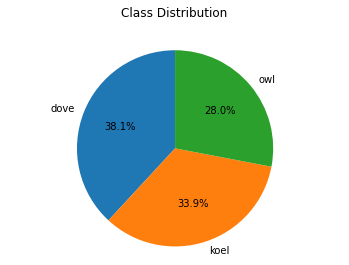

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set_title('Class Distribution',y=1.08)
ax.pie(class_dist,labels=class_dist.index,autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [ ]:
!rm -rf clean
!mkdir clean

In [ ]:
import numpy as np

In [ ]:
def calc_fft(y,rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)
  Y = abs(np.fft.rfft(y)/n)
  return (Y, freq)

In [ ]:
import librosa

In [ ]:
#Downsampling
if len(os.listdir('clean')) ==0:
  for f in tqdm(df.fname):
    signal, rate=librosa.load('dataset/'+f,sr=16000)
    mask=envelope(signal,rate,0.0005)
    wavfile.write(filename='clean/'+f,rate=rate,data=signal[mask])

100%|██████████| 90/90 [02:42<00:00,  1.80s/it]


In [ ]:
import pickle
import os
import numpy as np

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [ ]:
df.to_csv('sounds.csv', index=False)

In [ ]:
df=pd.read_csv('sounds.csv')

In [ ]:
df

,fname,label,length
0,504503_XC504503-SpurfowlNatal_ArmikaVetriver_2...,owl,62.223673
1,362850_XC362850-Asian%20Koel%2004%20-%2004Apr1...,koel,17.972245
2,68261_Eudynamys_scolopaceus_Siau-98-FRL_ID_8_4...,koel,47.738322
3,339652_XC339652-DaRec_20161009073154.wav,koel,139.041088
4,362851_XC362851-Asian%20Koel%2005%20-%2004Apr1...,koel,22.256327
...,...,...,...
85,412640_XC412640-HBF%20NG%20Kerk%20grounds%2027...,owl,24.517833
86,414218_XC414218-Columba_oenas-nom-FL%20X%20Har...,dove,12.669388
87,330496_XC330496-Asian%20koel.wav,koel,5.537959
88,421992_XC421992-NatalFrancolin_ArmikaWBron_201...,owl,73.273469


In [ ]:
classes=list(np.unique(df.label))

In [ ]:
fn2class=dict(zip(df.fname,df.label))

In [ ]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [ ]:
!cp -r /content/drive/My\ Drive/Capstone/best.h5  /content/models/

cp: cannot create regular file '/content/models/': Not a directory


In [ ]:
!cp -r /content/drive/My\ Drive/Capstone/pickles/conv.p  /content/models/

In [ ]:
model_path="/content/models/best.h5"
pickle_path="/content/models/conv.p"

In [ ]:
class Config:
  def __init__(self,mode='conv',nfilt=26,nfeat=13,nfft=512,rate=16000):
    self.mode=mode
    self.nfilt=nfilt
    self.nfeat=nfeat
    self.nfft=nfft
    self.rate=rate
    self.step=int(rate/10)
    self.p_path=os.path.join('/content/pickles',mode+'.p')

In [ ]:
with open(pickle_path,'rb') as handle:
  config=pickle.load(handle)

In [ ]:
def build_predictions(model,adir):
  y_true=[]
  y_pred=[]
  fn_prob={}
  print("Extracting audio features")
  for fn in tqdm(os.listdir(adir)):
    rate,wav = wavfile.read(os.path.join(adir,fn))
    label = fn2class[fn]
    c = classes.index(label)
    y_prob=[]

    for i in range(0,wav.shape[0]-config.step, config.step):
      sample = wav[i:i+config.step]
      x = mfcc(sample, rate, numcep=config.nfeat, nfilt=config.nfilt, nfft=config.nfft)
      x = (x- config.min)/(config.max - config.min)
      x = x.reshape(1, x.shape[0], x.shape[1],1 )

      y_hat = model.predict(x)
      y_prob.append(y_hat)
    y_pred.append(np.argmax(y_hat)%3)
    y_true.append(c)

    fn_prob[fn]=np.mean(y_prob, axis=1).flatten()
  return y_true, y_pred, fn_prob


In [ ]:
model=load_model(model_path)

In [ ]:
y_true, y_pred, fn_prob = build_predictions(model,'clean')

  0%|          | 0/90 [00:00<?, ?it/s]

Extracting audio features


100%|██████████| 90/90 [21:22<00:00, 14.25s/it]


In [ ]:
acc_score=accuracy_score(y_true,y_pred)

In [ ]:
print(acc_score)

0.9222222222222223


In [ ]:
!cp -r /content/drive/My\ Drive/pklspec/best2.h5  /content/models/

#Model2

In [ ]:
model2=load_model("/content/models/best2.h5")

In [ ]:
y_true, y_pred, fn_prob = build_predictions(model2,'clean')

  0%|          | 0/73 [00:00<?, ?it/s]

Extracting audio features


100%|██████████| 73/73 [13:30<00:00, 11.10s/it]


In [ ]:
acc_score2=accuracy_score(y_true,y_pred)

In [ ]:
print(acc_score2)

0.7217920353982301
